#### kosis.kr -> 범죄/안전 -> 교통사고 사망자수

#### 주야별 교통사고 - 사망자수

- 2021년, 주야 사망자 수 평균 차이가 있는가? (주간, 야간 95% 신뢰구간 : mean+-1.96*std)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

np.set_printoptions(precision=5, suppress=True)

In [2]:
pd_data = pd.read_csv("주야별_교통사고_20230320214415.csv", encoding="cp949")
np_data = pd_data.to_numpy()

# print(np_data[2:, 1:])
np_data = np_data[2:, 1:].astype(np.float64)

In [3]:
# 주야간 평균값 구하기 -1

mean = np.mean(np_data, axis=0)
print(mean)

[133.83333 109.16667]


In [4]:
# 주야간 평균값 구하기 -2

d_mean = np.mean(np_data[:,0])
n_mean = np.mean(np_data[:,1])

print(f"주간 사망자 평균 : {d_mean} \n야간 사망자 평균 : {n_mean}")

주간 사망자 평균 : 133.83333333333334 
야간 사망자 평균 : 109.16666666666667


In [5]:
# by statsmodels
x = np_data[:,0]
y = np_data[:,1]

x = sm.add_constant(x)

model = sm.OLS(y,x)
result = model.fit()

print(result.summary())
print(result.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     8.041
Date:                Wed, 22 Mar 2023   Prob (F-statistic):             0.0177
Time:                        14:42:44   Log-Likelihood:                -48.806
No. Observations:                  12   AIC:                             101.6
Df Residuals:                      10   BIC:                             102.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2258     33.777      0.421      0.6

c:\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
# SSE 구하기

# print(x, x.shape)
# print(result.params, result.params.shape)

pred = np.sum(x * result.params, axis=1)
# print(pred) # 예측값
# print(y)  # 실제값

sse = np.sum((pred-y)**2)
print(sse)

2395.418705913088


0.7093964991726899 14.22576852738834


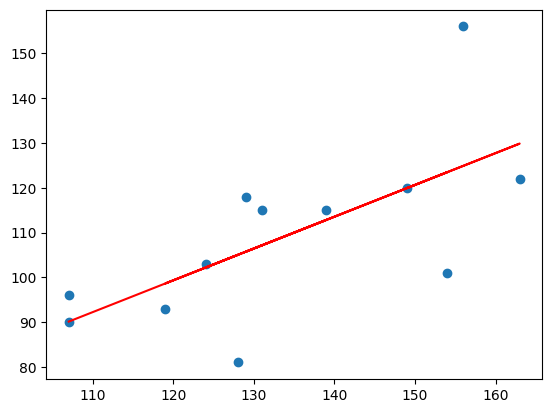

In [7]:
# plot, regression line
x = np_data[:,0]
y = np_data[:,1]

x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)
xy_corr = np.corrcoef(x,y)[0,1]

slope = xy_corr*(y_std/x_std)
intercept = y_mean - slope*x_mean

print(slope, intercept)

_, axe = plt.subplots()
axe.scatter(x,y)
axe.plot(x, x*slope+intercept, c='r')